In [2]:
import tensorflow_probability as tfp
import tensorflow as tf
import numpy as np
import h5py
import matplotlib.pyplot as plt
from began.visualization import plot, mplot
from scipy.ndimage import gaussian_filter
from began.optimization import get_l2_loss_and_gradient_function


Minimizing a tensorflow model.

In [3]:
gen = tf.keras.models.load_model("/home/bthorne/projects/gan/began/models/generator.h5")

In [4]:
z_in = np.random.randn(1, 64)
ma = gen(z_in)

fwhm_in_pix = 120. / 5.
sigma = fwhm_in_pix / np.sqrt(8 * np.log(2))
print('Sigma:', sigma)
ma_smo = gaussian_filter(ma[0, :, :, 0], sigma)

Sigma: 10.191861603456228


In [7]:
l2 = get_l2_loss_and_gradient_function(ma_smo[None, :, :, None], gen)

In [10]:
x = tf.Variable(np.random.randn(1, 64), dtype=np.float32)

In [9]:
opt = tfp.optimizer.lbfgs_minimize(l2, initial_position=x, max_iterations=20, tolerance=1e-08)

(1, 256, 256, 1)
(1, 256, 256, 1)


ResourceExhaustedError: OOM when allocating tensor with shape[1,65536,1600] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu [Op:Conv2DBackpropInput]

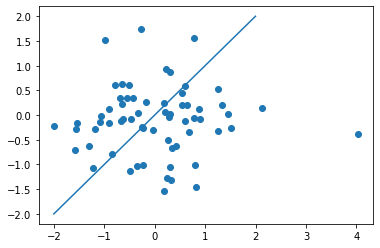

In [11]:
fig, ax = plt.subplots(1, 1)
ax.scatter(z_in, opt.position.numpy())
ax.plot(np.linspace(-2, 2), np.linspace(-2, 2))

In [12]:
gen_smo_prediction = gen(opt.position)

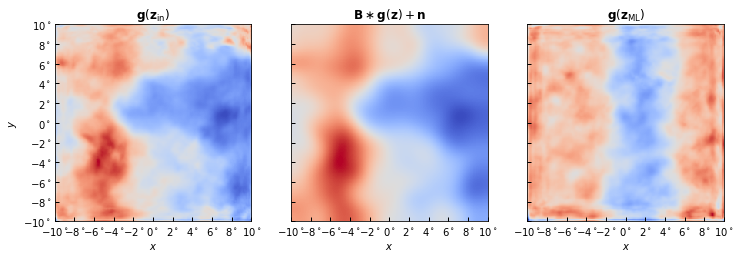

In [61]:
fig, axes = mplot(np.concatenate((ma[..., 0], ma_smo[None, ...], gen_smo_prediction[..., 0])), extent=[-10, 10, -10, 10], xlabels=[r"$x$", r"$x$", r"$x$"], ylabels=[r"$y$", None, None])
titles = [r"$\mathbf{g}(\mathbf{z_{\rm in}})$", r"$\mathbf{B} \ast \mathbf{g}(\mathbf{z}) + \mathbf{n}$", r"$\mathbf{g}(\mathbf{z}_{\rm ML})$"]
for ax, title in zip(axes, titles):
    ax.set_title(title)
fig.savefig("plots/hyper-res-rec-g.pdf")

In [ ]:
ax.set_xticklabels()

In [14]:
import h5py
from pathlib import Path

In [76]:
#for my maps
#RES = 256
#STEP_SIZE = 4 
#GAL_CUT = 16
#record_dir = Path("../data/preprocessed/")
#fpath = record_dir / "GNILC_dust_map_{:d}_st{:d}_gcut{:d}.npy".format(RES, int(STEP_SIZE), int(GAL_CUT))
#train_images = np.load(fpath).astype(np.float32)
#x_train = train_images[21, :, :, 0]

# for kevin's maps

with h5py.File("/home/bthorne/projects/gan/began/data/preprocessed/Planck_dust_cuts_353GHz_norm_log_res256.h5", 'r') as f:
    x_train = f['100'][:]
    print(f.keys())
x_train_smo = gaussian_filter(x_train, sigma)

<KeysViewHDF5 ['0', '1', '10', '100', '1000', '1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008', '1009', '101', '1010', '1011', '1012', '1013', '1014', '1015', '1016', '1017', '1018', '1019', '102', '1020', '1021', '1022', '1023', '1024', '1025', '1026', '1027', '1028', '1029', '103', '1030', '1031', '1032', '1033', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '15', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '16', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '17', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '18', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '19', '190', '191',

In [67]:
l2 = get_L2_loss_and_gradient_function(x_train, gen)
x = tf.Variable(np.random.randn(1, 64), dtype=np.float32)
opt = tfp.optimizer.lbfgs_minimize(l2, initial_position=x, max_iterations=20000, tolerance=1e-05)
x_train_prediction = gen(opt.position)
x_train_prediction_smo = gaussian_filter(x_train_prediction[0, :, :, 0], sigma)

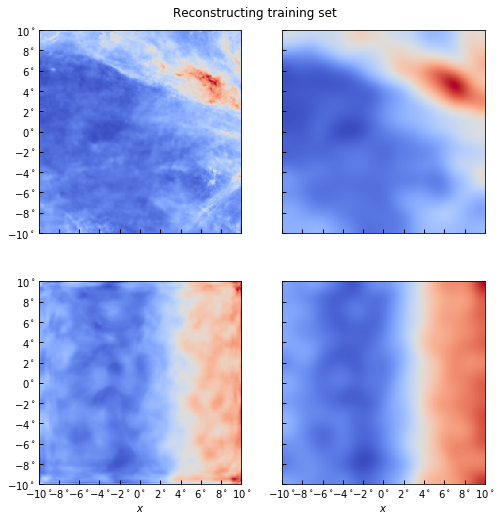

In [66]:
fig, axes = mplot(np.concatenate((x_train[None, ...], x_train_smo[None, ...], x_train_prediction[..., 0], x_train_prediction_smo[None, ...])), xlabels=[None, None, r"$x$", r"$x$"], extent=[-10, 10, -10, 10], title="Reconstructing training set")

In [18]:
print(opt.num_iterations)
print(opt.converged)
print(opt.position)

tf.Tensor(383, shape=(), dtype=int32)
tf.Tensor([ True], shape=(1,), dtype=bool)
tf.Tensor(
[[ 0.72178626  0.5832388  -1.1010016  -0.9870253   0.88142216  0.04829815
   0.9224829   0.5524019   1.0980382   0.02342293  0.81357276  0.29420906
  -0.5795405  -0.12143479  0.8892091  -0.68024516  0.5155575  -1.1112454
   0.7474276  -0.5091047   0.34711123  0.56224954 -0.47401816 -0.8053071
  -0.6038776  -0.00730821  1.4810874  -0.2418664   0.1238664  -0.82247126
   1.1242266  -1.2649575   0.0785407  -0.07325264  0.7978666   1.5946921
   0.07064913 -0.13035579  1.6811783  -0.00763237 -0.5630869   0.5973477
  -1.0409598   1.5414383   1.3686366   0.9086818  -0.02868064 -0.21487875
  -0.3344882   0.84341174  0.1724918  -0.3271246  -0.37055716  0.3980596
  -0.09464905  0.9673785   0.08258741  1.6418616  -0.27312443  0.3721764
  -0.24153149 -1.0110298   0.2118435  -0.3196018 ]], shape=(1, 64), dtype=float32)


In [71]:
def l2(x):
    with tf.GradientTape() as tape:
        tape.watch(x)
        loss_value = tf.linalg.norm(gen(x) - x_train)
    jac = tape.gradient(loss_value,x)
    loss_value = tf.reshape(loss_value, [1])
    return loss_value,jac

x = tf.Variable(np.random.randn(1, 64).astype(np.float32))
opt = tfp.optimizer.lbfgs_minimize(l2,initial_position = x, tolerance=1e-05, max_iterations=200)
x_train_prediction = gen(opt.position)
x_train_predictio_smo = gaussian_filter(x_train_prediction, sigma)

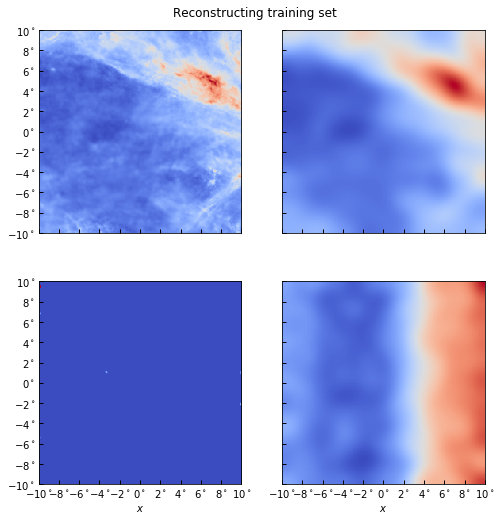

In [73]:
fig, axes = mplot(np.concatenate((x_train[None, ...], x_train_smo[None, ...], x_train_prediction[..., 0], x_train_prediction_smo[None, ...])), xlabels=[None, None, r"$x$", r"$x$"], extent=[-10, 10, -10, 10], title="Reconstructing training set")



In [20]:
import h5py

with h5py.File("/home/bthorne/projects/gan/began/data/preprocessed/Planck_dust_cuts_353GHz_norm_log_res256.h5", 'r') as f:
    kma = f['1'][:]

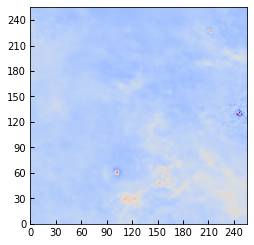

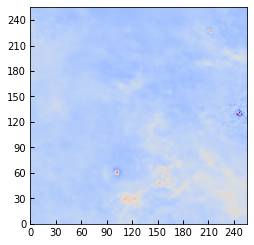

In [21]:
plot(kma)

In [22]:
import began
LAT_DIM = 128
vae_model = began.CVAE(LAT_DIM)


In [23]:
vae_model.load_weights('/home/bthorne/projects/gan/began/models/vae.h5')

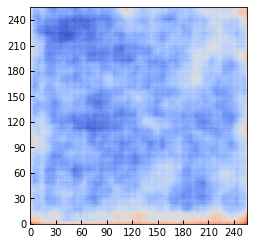

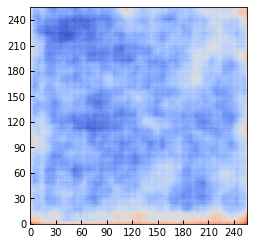

In [24]:
plot(vae_model.decode(np.random.randn(1, 128).astype(np.float32))[0, :, :, 0])

In [25]:
z_enc = vae_model.encode(x_train[None, :, :, None])


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



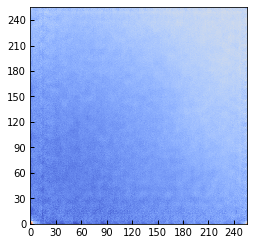

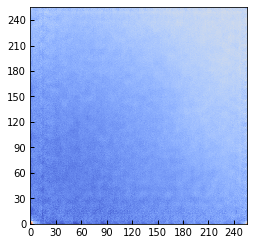

In [26]:
plot(vae_model.decode(z_enc)[0, :, :, 0])